In [38]:
import os
import shutil
import pandas as pd
import pytz
from datetime import datetime
from pynhd import NLDI
import urllib.request
#import progressbar
import rasterio
import rasterio.plot
import pyproj
from rasterio.crs import CRS

import geopandas as gpd # for reading the shapefile


## Filtering the files between April and August

In [17]:

def filter_and_move_files(source_folder, destination_folder,state):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    # Path to the state directory
    state_directory = os.path.join(source_folder, state)


    # Generate a list of expected directory names for years 2000 to 2020
    expected_dirs = [f"{state}_{year}" for year in range(2000, 2021)]


    # Define the date range with timezone
    utc = pytz.UTC
    start_date = utc.localize(datetime.strptime("2010-04-01", "%Y-%m-%d"))
    end_date = utc.localize(datetime.strptime("2010-08-31", "%Y-%m-%d"))

# Iterate over all directories and subdirectories starting from the state directory
    for root, dirs, files in os.walk(state_directory):
        # Only proceed if the last part of `root` (directory name) is in our list of expected directories
        if os.path.basename(root) in expected_dirs:
            # Construct the path to the 'Flood_Events' subdirectory
            flood_events_path = os.path.join(root, 'Flood_Events')
            
            # Check if the 'Flood_Events' directory exists
            if os.path.exists(flood_events_path):
                # Iterate through all files in the 'Flood_Events' directory
                for fe_root, fe_dirs, fe_files in os.walk(flood_events_path):
                    for file in fe_files:
                        if file.endswith('.csv'):
                            file_path = os.path.join(fe_root, file)
                            try:
                                # Read the datetimeUTC column
                                df = pd.read_csv(file_path, usecols=['datetimeUTC'])
                                
                                # Convert dates to datetime objects
                                df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)
                                year = ##extract from the root directory which is {state}_{year}

                                start_date = utc.localize(datetime.strptime(f"{year}-04-01", "%Y-%m-%d"))
                                end_date = utc.localize(datetime.strptime(f"{year}-08-31", "%Y-%m-%d"))

                                # Filter dates within the range
                                if df['datetimeUTC'].between(start_date, end_date).any():
                                    # Move the file if any date falls within the range
                                    shutil.move(file_path, os.path.join(destination_folder, file))
                                    print(f"Moved file: {file}")
                            except Exception as e:
                                print(f"Error processing file {file}: {e}")


In [4]:
import os
import shutil
import pandas as pd
import pytz
from datetime import datetime

def filter_and_move_files(source_folder, destination_folder, state):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    # Path to the state directory
    state_directory = os.path.join(source_folder, state)

    # Define the timezone
    utc = pytz.UTC

    # Iterate over all directories and subdirectories starting from the state directory
    for root, dirs, files in os.walk(state_directory):
        # Check if the current directory is one of the expected state_year directories
        dir_name = os.path.basename(root)
        if dir_name.startswith(state) and dir_name[-4:].isdigit():
            year = dir_name[-4:]  # Extract the year from the folder name
            flood_events_path = os.path.join(root, 'Flood_Events')
            
            # Check if the 'Flood_Events' directory exists
            if os.path.exists(flood_events_path):
                # Iterate through all files in the 'Flood_Events' directory
                for fe_root, fe_dirs, fe_files in os.walk(flood_events_path):
                    for file in fe_files:
                        if file.endswith('.csv'):
                            file_path = os.path.join(fe_root, file)
                            try:
                                # Read the datetimeUTC column
                                df = pd.read_csv(file_path, usecols=['datetimeUTC'])
                                
                                # Convert dates to datetime objects
                                df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)

                                # Define the date range for the specific year
                                start_date = utc.localize(datetime.strptime(f"{year}-04-01", "%Y-%m-%d"))
                                end_date = utc.localize(datetime.strptime(f"{year}-08-31", "%Y-%m-%d"))

                                # Filter dates within the range
                                if df['datetimeUTC'].between(start_date, end_date).any():
                                    # Move the file if any date falls within the range
                                    shutil.move(file_path, os.path.join(destination_folder, file))
                                    print(f"Moved file: {file}")
                            except Exception as e:
                                print(f"Error processing file {file}: {e}")



In [5]:
#Usage
State = 'TN'
source_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data"
destination_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Final_events"
filter_and_move_files(source_folder, destination_folder,State)

Moved file: Flood_Event_10_03426385.csv
Moved file: Flood_Event_11_03426385.csv
Moved file: Flood_Event_12_03426385.csv
Moved file: Flood_Event_13_03426385.csv
Moved file: Flood_Event_14_03426385.csv
Moved file: Flood_Event_5_03426385.csv
Moved file: Flood_Event_6_03426385.csv
Moved file: Flood_Event_7_03426385.csv
Moved file: Flood_Event_8_03426385.csv
Moved file: Flood_Event_9_03426385.csv
Moved file: Flood_Event_10_03426470.csv
Moved file: Flood_Event_5_03426470.csv
Moved file: Flood_Event_6_03426470.csv
Moved file: Flood_Event_7_03426470.csv
Moved file: Flood_Event_8_03426470.csv
Moved file: Flood_Event_9_03426470.csv
Moved file: Flood_Event_10_03430147.csv
Moved file: Flood_Event_11_03430147.csv
Moved file: Flood_Event_12_03430147.csv
Moved file: Flood_Event_13_03430147.csv
Moved file: Flood_Event_14_03430147.csv
Moved file: Flood_Event_15_03430147.csv
Moved file: Flood_Event_16_03430147.csv
Moved file: Flood_Event_17_03430147.csv
Moved file: Flood_Event_8_03430147.csv
Moved file:

C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_8_03431700.csv
Moved file: Flood_Event_9_03431700.csv
Moved file: Flood_Event_10_034323531.csv
Moved file: Flood_Event_11_034323531.csv
Moved file: Flood_Event_12_034323531.csv
Moved file: Flood_Event_5_034323531.csv
Moved file: Flood_Event_6_034323531.csv
Moved file: Flood_Event_7_034323531.csv
Moved file: Flood_Event_8_034323531.csv
Moved file: Flood_Event_9_034323531.csv
Moved file: Flood_Event_11_03432390.csv
Moved file: Flood_Event_12_03432390.csv
Moved file: Flood_Event_13_03432390.csv
Moved file: Flood_Event_14_03432390.csv
Moved file: Flood_Event_1_03435970.csv
Moved file: Flood_Event_2_03435970.csv
Moved file: Flood_Event_3_03435970.csv
Moved file: Flood_Event_4_03435970.csv
Moved file: Flood_Event_5_03435970.csv
Moved file: Flood_Event_6_03435970.csv
Moved file: Flood_Event_7_03435970.csv
Moved file: Flood_Event_8_03435970.csv


C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_9_03435970.csv
Moved file: Flood_Event_2_03466228.csv
Moved file: Flood_Event_3_03466228.csv
Moved file: Flood_Event_10_03536550.csv
Moved file: Flood_Event_11_03536550.csv
Moved file: Flood_Event_12_03536550.csv
Moved file: Flood_Event_13_03536550.csv
Moved file: Flood_Event_9_03536550.csv
Moved file: Flood_Event_14_03538235.csv
Moved file: Flood_Event_15_03538235.csv
Moved file: Flood_Event_16_03538235.csv
Moved file: Flood_Event_17_03538235.csv
Moved file: Flood_Event_18_03538235.csv
Moved file: Flood_Event_19_03538235.csv
Moved file: Flood_Event_20_03538235.csv
Moved file: Flood_Event_21_03538235.csv
Moved file: Flood_Event_22_03538235.csv
Moved file: Flood_Event_23_03538235.csv
Moved file: Flood_Event_24_03538235.csv
Moved file: Flood_Event_25_03538235.csv
Moved file: Flood_Event_26_03538235.csv
Moved file: Flood_Event_27_03538235.csv
Moved file: Flood_Event_28_03538235.csv
Moved file: Flood_Event_29_03538235.csv
Moved file: Flood_Event_30_03538235.csv
Move

C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_29_07031692.csv
Moved file: Flood_Event_30_07031692.csv
Moved file: Flood_Event_31_07031692.csv


C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_32_07031692.csv
Moved file: Flood_Event_33_07031692.csv
Moved file: Flood_Event_10_03426385.csv
Moved file: Flood_Event_11_03426385.csv
Moved file: Flood_Event_12_03426385.csv
Moved file: Flood_Event_13_03426385.csv
Moved file: Flood_Event_14_03426385.csv
Moved file: Flood_Event_15_03426385.csv
Moved file: Flood_Event_16_03426385.csv
Moved file: Flood_Event_17_03426385.csv
Moved file: Flood_Event_18_03426385.csv
Moved file: Flood_Event_19_03426385.csv
Moved file: Flood_Event_20_03426385.csv
Moved file: Flood_Event_21_03426385.csv
Moved file: Flood_Event_22_03426385.csv
Moved file: Flood_Event_9_03426385.csv
Moved file: Flood_Event_10_03426470.csv
Moved file: Flood_Event_11_03426470.csv
Moved file: Flood_Event_12_03426470.csv
Moved file: Flood_Event_13_03426470.csv
Moved file: Flood_Event_7_03426470.csv
Moved file: Flood_Event_8_03426470.csv
Moved file: Flood_Event_9_03426470.csv
Moved file: Flood_Event_10_03430147.csv
Moved file: Flood_Event_11_03430147.csv
Move

C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_6_03312259.csv
Moved file: Flood_Event_7_03312259.csv
Moved file: Flood_Event_8_03312259.csv
Moved file: Flood_Event_9_03312259.csv
Moved file: Flood_Event_10_03426470.csv
Moved file: Flood_Event_11_03426470.csv
Moved file: Flood_Event_12_03426470.csv
Moved file: Flood_Event_13_03426470.csv
Moved file: Flood_Event_14_03426470.csv
Moved file: Flood_Event_15_03426470.csv
Moved file: Flood_Event_8_03426470.csv
Moved file: Flood_Event_9_03426470.csv
Moved file: Flood_Event_10_03431300.csv
Moved file: Flood_Event_11_03431300.csv
Moved file: Flood_Event_12_03431300.csv
Moved file: Flood_Event_13_03431300.csv
Moved file: Flood_Event_14_03431300.csv
Moved file: Flood_Event_15_03431300.csv
Moved file: Flood_Event_16_03431300.csv
Moved file: Flood_Event_17_03431300.csv
Moved file: Flood_Event_18_03431300.csv
Moved file: Flood_Event_19_03431300.csv
Moved file: Flood_Event_20_03431300.csv
Moved file: Flood_Event_21_03431300.csv
Moved file: Flood_Event_22_03431300.csv
Moved 

C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_15_03431700.csv
Moved file: Flood_Event_16_03431700.csv
Moved file: Flood_Event_17_03431700.csv
Moved file: Flood_Event_18_03431700.csv
Moved file: Flood_Event_19_03431700.csv
Moved file: Flood_Event_20_03431700.csv
Moved file: Flood_Event_21_03431700.csv
Moved file: Flood_Event_22_03431700.csv
Moved file: Flood_Event_23_03431700.csv
Moved file: Flood_Event_24_03431700.csv
Moved file: Flood_Event_25_03431700.csv
Moved file: Flood_Event_26_03431700.csv
Moved file: Flood_Event_27_03431700.csv
Moved file: Flood_Event_28_03431700.csv
Moved file: Flood_Event_29_03431700.csv
Moved file: Flood_Event_30_03431700.csv
Moved file: Flood_Event_31_03431700.csv
Moved file: Flood_Event_32_03431700.csv
Moved file: Flood_Event_33_03431700.csv


C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_8_03431700.csv
Moved file: Flood_Event_9_03431700.csv
Moved file: Flood_Event_10_03491544.csv
Moved file: Flood_Event_11_03491544.csv
Moved file: Flood_Event_12_03491544.csv
Moved file: Flood_Event_13_03491544.csv
Moved file: Flood_Event_14_03491544.csv
Moved file: Flood_Event_15_03491544.csv


C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_4_03491544.csv
Moved file: Flood_Event_5_03491544.csv
Moved file: Flood_Event_6_03491544.csv
Moved file: Flood_Event_7_03491544.csv
Moved file: Flood_Event_8_03491544.csv
Moved file: Flood_Event_9_03491544.csv
Moved file: Flood_Event_4_03538970.csv
Moved file: Flood_Event_5_03538970.csv
Moved file: Flood_Event_6_03538970.csv
Moved file: Flood_Event_7_03538970.csv
Moved file: Flood_Event_8_03538970.csv
Moved file: Flood_Event_10_03597590.csv
Moved file: Flood_Event_11_03597590.csv
Moved file: Flood_Event_12_03597590.csv
Moved file: Flood_Event_13_03597590.csv
Moved file: Flood_Event_14_03597590.csv
Moved file: Flood_Event_15_03597590.csv
Moved file: Flood_Event_16_03597590.csv
Moved file: Flood_Event_17_03597590.csv
Moved file: Flood_Event_18_03597590.csv
Moved file: Flood_Event_19_03597590.csv
Moved file: Flood_Event_20_03597590.csv
Moved file: Flood_Event_21_03597590.csv
Moved file: Flood_Event_22_03597590.csv
Moved file: Flood_Event_23_03597590.csv
Moved file:

C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_17_03605078.csv
Moved file: Flood_Event_18_03605078.csv
Moved file: Flood_Event_19_03605078.csv
Moved file: Flood_Event_20_03605078.csv
Moved file: Flood_Event_21_03605078.csv
Moved file: Flood_Event_5_03605078.csv
Moved file: Flood_Event_6_03605078.csv
Moved file: Flood_Event_7_03605078.csv


C:\Users\mgalib\AppData\Local\Temp\ipykernel_19996\1621012056.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce', utc=True)


Moved file: Flood_Event_8_03605078.csv
Moved file: Flood_Event_9_03605078.csv
Moved file: Flood_Event_10_07024200.csv
Moved file: Flood_Event_11_07024200.csv
Moved file: Flood_Event_12_07024200.csv
Moved file: Flood_Event_13_07024200.csv
Moved file: Flood_Event_14_07024200.csv
Moved file: Flood_Event_15_07024200.csv
Moved file: Flood_Event_16_07024200.csv
Moved file: Flood_Event_17_07024200.csv
Moved file: Flood_Event_6_07024200.csv
Moved file: Flood_Event_7_07024200.csv
Moved file: Flood_Event_8_07024200.csv
Moved file: Flood_Event_9_07024200.csv
Moved file: Flood_Event_10_07026680.csv
Moved file: Flood_Event_11_07026680.csv
Moved file: Flood_Event_12_07026680.csv
Moved file: Flood_Event_5_07026680.csv
Moved file: Flood_Event_6_07026680.csv
Moved file: Flood_Event_7_07026680.csv
Moved file: Flood_Event_8_07026680.csv
Moved file: Flood_Event_9_07026680.csv
Moved file: Flood_Event_10_03312259.csv
Moved file: Flood_Event_11_03312259.csv
Moved file: Flood_Event_12_03312259.csv
Moved file:

## Downloading the shapefiles for the USGS sites

In [1]:
!pip install aiosqlite

In [39]:


def extract_gauge_numbers(source_folder):
    gauge_numbers = []
    for file in os.listdir(source_folder):
        if file.endswith('.csv'):
            # Assuming gauge number is always after the last underscore
            parts = file.split('_')
            gauge_number = parts[-1].replace('.csv', '')
            gauge_numbers.append(gauge_number)
    return gauge_numbers

def download_and_save_watersheds(gauge_numbers, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for gauge in gauge_numbers:
        try:
            # Get the watershed using the gauge number
            watershed = NLDI().get_basins(gauge)
            
            # Save the watershed file as a shapefile
            shapefile_filename = os.path.join(destination_folder, f'shape_{gauge}.shp')
            watershed.to_file(filename=shapefile_filename, driver='ESRI Shapefile')
            print(f'Shapefile saved: {shapefile_filename}')
        except Exception as e:
            print(f'Failed to process gauge {gauge}: {e}')



In [40]:
# usage:
source_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Final_events"
destination_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites"
gauge_numbers = extract_gauge_numbers(source_folder)
download_and_save_watersheds(gauge_numbers, destination_folder)


Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03312259.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03426385.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03426470.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03430147.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03431300.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03431700.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_034323531.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03432376.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03432387.shp
Shapefile saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites\shape_03432390.shp
Shapefile saved: C:/Users/mgalib/Box/Fi

## Making Watershed Extent file using precipiation data file and watershed shapefiles

In [22]:
import os
import pandas as pd
import geopandas as gpd
from datetime import timedelta



def determine_utm_crs(df):
    #df = gpd.read_file(shapefile_path)
    # Calculate the centroid of the geometries
    df['Center_point'] = df['geometry'].centroid
    # Extract latitude and longitude from the centroid
    lon = df['Center_point'].x.iloc[0]
    lat = df['Center_point'].y.iloc[0]
    
    # Determine N or S latitude zone
    lat_zone = 'N' if lat >= 0 else 'S'
    
    # UTM zones for the conterminous United States
    if -138 <= lon < -132:
        zone = '08'
    elif -132 <= lon < -126:
        zone = '09'
    elif -126 <= lon < -120:
        zone = '10'
    elif -120 <= lon < -114:
        zone = '11'
    elif -114 <= lon < -108:
        zone = '12'
    elif -108 <= lon < -102:
        zone = '13'
    elif -102 <= lon < -96:
        zone = '14'
    elif -96 <= lon < -90:
        zone = '15'
    elif -90 <= lon < -84:
        zone = '16'
    elif -84 <= lon < -78:
        zone = '17'
    elif -78 <= lon < -72:
        zone = '18'
    elif -72 <= lon < -66:
        zone = '19'
    elif -66 <= lon < -60:
        zone = '20'
    else:
        return "Location is outside the specified range for conterminous US."

    # Create the CRS string using the UTM zone and latitude zone
    crs_string = f'EPSG:326{zone}' if lat_zone == 'N' else f'EPSG:327{zone}'
    return crs_string


def get_date_range(file_path):
    try:
        df = pd.read_csv(file_path, usecols=['datetimeUTC'])
        df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'], errors='coerce')
        date_min = df['datetimeUTC'].min() - timedelta(days=5)  # Subtract 5 days
        date_max = df['datetimeUTC'].max() + timedelta(days=7)  # Add 7 days
        return date_min, date_max
    except Exception as e:
        print(f"Error processing dates in {file_path}: {e}")
        return None, None

def get_extent_and_area(file_path):
    try:
        gdf = gpd.read_file(file_path)
        bounds = gdf.total_bounds # returns (minx, miny, maxx, maxy)
        if gdf.crs.is_geographic:
            # Transform to a projected CRS for area calculation (if necessary)
            gdf = gdf.to_crs(determine_utm_crs(gdf))  # using Web Mercator for example, but choose appropriate for your data
        area = gdf.geometry.area.sum()/2589988.11  # Convert square meters to square miles
        
        return bounds, area
    except Exception as e:
        print(f"Error processing extent and area in {file_path}: {e}")
        return None, None

def combine_information(csv_folder, shp_folder, output_csv):
    records = []
    
    # Process each CSV file for date ranges
    for csv_file in os.listdir(csv_folder):
        if csv_file.endswith('.csv'):
            gauge_number = csv_file.split('_')[-1].replace('.csv', '')
            csv_path = os.path.join(csv_folder, csv_file)
            date_min, date_max = get_date_range(csv_path)
            
            # Find corresponding shapefile
            shp_path = os.path.join(shp_folder, f'shape_{gauge_number}.shp')
            if os.path.exists(shp_path):
                extent_area = get_extent_and_area(shp_path)
                if extent_area and date_min and date_max:
                    bounds, area = extent_area
                    records.append({
                        'Gauge_No': gauge_number,
                        'North': bounds[3],
                        'South': bounds[1],
                        'East': bounds[2],
                        'West': bounds[0],
                        'start_date': date_min.strftime('%Y-%m-%d') if date_min else None,
                        'end_date': date_max.strftime('%Y-%m-%d') if date_max else None,
                        'Area (sq_miles)': area
                    })
    
    # Create DataFrame and save to CSV
    df = pd.DataFrame(records)
    df.to_csv(output_csv, index=False)
    print(f"Output CSV saved: {output_csv}")


In [23]:
# Example usage:
csv_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Final_events"
shp_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites"
output_csv = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/watershed_extent_TN.csv"
combine_information(csv_folder, shp_folder, output_csv)


C:\Users\mgalib\AppData\Local\Temp\ipykernel_20572\1847249215.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['Center_point'] = df['geometry'].centroid
C:\Users\mgalib\AppData\Local\Temp\ipykernel_20572\1847249215.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['Center_point'] = df['geometry'].centroid
C:\Users\mgalib\AppData\Local\Temp\ipykernel_20572\1847249215.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['Center_point'] = df['geometry'].centroid
C:\Users\mgalib\AppData\Local\Temp\ipykernel_20572\1847249215.py:11: UserWarning: Geometry is in 

Output CSV saved: C:/Users/mgalib/Box/Finley_UH_work/Data/TN/watershed_extent_TN.csv


C:\Users\mgalib\AppData\Local\Temp\ipykernel_20572\1847249215.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['Center_point'] = df['geometry'].centroid


In [25]:

shp_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites"
shp_path = os.path.join(shp_folder, f'shape_03312259.shp')
gdf = gpd.read_file(shp_path)

In [26]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
#gdf = gpd.read_file(file_path)
bounds = gdf.total_bounds # returns (minx, miny, maxx, maxy)
if gdf.crs.is_geographic:
    # Transform to a projected CRS for area calculation (if necessary)
    gdf = gdf.to_crs(determine_utm_crs(gdf))  # using Web Mercator for example, but choose appropriate for your data
area = gdf.geometry.area.sum()/2589988.11  # Convert square meters to square miles


In [19]:
area

15.288276545720644

In [9]:
# Example usage
shp_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites"
shp_path = os.path.join(shp_folder, f'shape_03312259.shp')
gdf = gpd.read_file(shp_path)

crs_string = determine_utm_crs(gdf)
print(crs_string)


EPSG:32616


C:\Users\mgalib\AppData\Local\Temp\ipykernel_20572\44320846.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['Center_point'] = df['geometry'].centroid


Text(172.20861549766855, 0.5, 'Longitude (DD)')

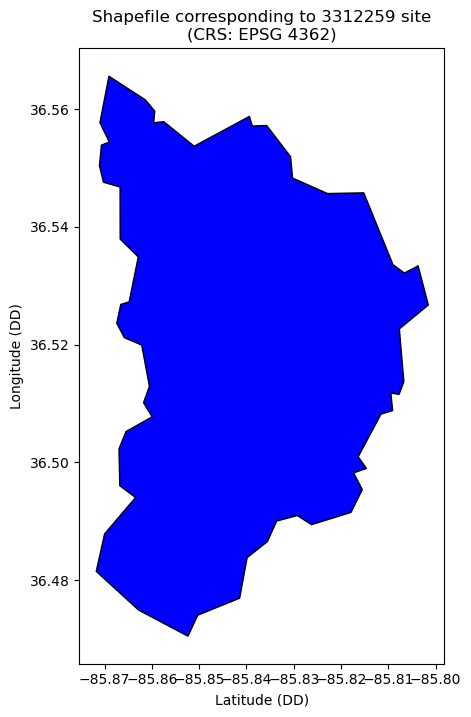

In [34]:
## Plot the watershed
import matplotlib.pyplot as plt
## DD indicates latitude/ longitude degrees is followed by immediately followed by decimal
shp_folder = "C:/Users/mgalib/Box/Finley_UH_work/Data/TN/Shapefiles_sites"
shp_path = os.path.join(shp_folder, f'shape_03312259.shp')
gdf = gpd.read_file(shp_path)

ax = gdf.plot(facecolor="b", 
                    edgecolor="k", 
                    figsize=(8, 8))
plt.title(f"Shapefile corresponding to " +str(3312259) +" site\n(CRS: EPSG 4362)")
plt.xlabel("Latitude (DD)")
plt.ylabel("Longitude (DD)")

